# 可视化数据集的分布

在处理一组数据时，您通常想做的第一件事就是了解变量的分布情况。本教程的这一章将简要介绍 seaborn 中用于检查单变量和双变量分布的一些工具。 您可能还需要查看[categorical.html](categorical.html #categical-tutorial)章节中的函数示例，这些函数可以轻松地比较变量在其他变量级别上的分布。

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
sns.set(color_codes=True)

## 绘制单变量分布

在 seaborn 中想要快速查看单变量分布的最方便的方法是使用[`distplot()`](../generated/seaborn.distplot.html#seaborn.distplot "seaborn.distplot")函数。默认情况下，该方法将会绘制直方图[histogram](https://en.wikipedia.org/wiki/Histogram)并拟合[内核密度估计] [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE).

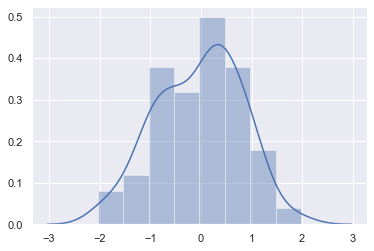

In [5]:
x = np.random.normal(size=100)
sns.distplot(x);

### 直方图

对于直方图我们可能很熟悉，而且 matplotlib 中已经存在`hist`函数。 直方图首先确定数据区间，然后观察数据落入这些区间中的数量来绘制柱形图以此来表征数据的分布情况。
为了说明这一点，让我们删除密度曲线并添加一个 rug plot，它在每个观察值上画一个小的垂直刻度。您可以使用[`rugplot()`](../generated/seaborn.rugplot.html#seaborn.rugplot "seaborn.rugplot") 函数来创建 rugplot 本身，但是也可以在 [`distplot()`](../generated/seaborn.distplot.html#seaborn.distplot "seaborn.distplot")中使用:

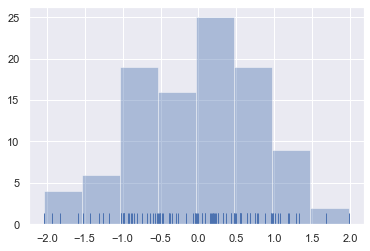

In [6]:
sns.distplot(x, kde=False, rug=True);

在绘制柱状图时，您的主要选择是要使用的“桶”的数量和放置它们的位置。 [`distplot()`](../generated/seaborn.distplot.html#seaborn.distplot "seaborn.distplot") 使用一个简单的规则来很好地猜测默认情况下正确的数字是多少，但是尝试更多或更少的“桶”可能会揭示数据中的其他特性:

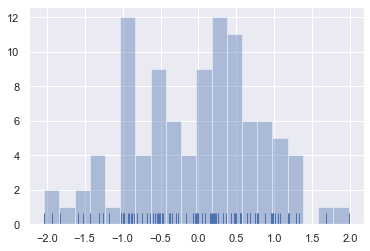

In [7]:
sns.distplot(x, bins=20, kde=False, rug=True);

### 核密度估计

可能你对核密度估计不太熟悉，但它可以是绘制分布形状的有力工具。和直方图一样，KDE 图沿另一个轴的高度，编码一个轴上的观测密度：

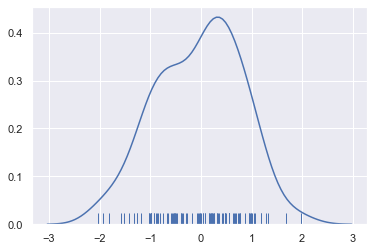

In [8]:
sns.distplot(x, hist=False, rug=True);

绘制 KDE 比绘制直方图更需要计算。每个观测值首先被一个以该值为中心的正态(高斯)曲线所取代:

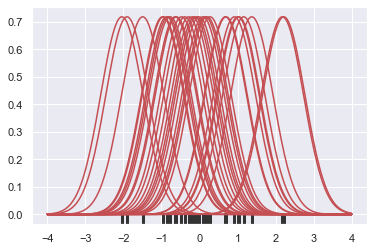

In [9]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

接下来，对这些曲线求和，计算支持网格(support grid)中每个点的密度值。然后对得到的曲线进行归一化，使曲线下的面积等于 1:

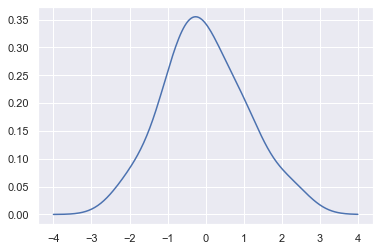

In [10]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

我们可以看到，如果在 seaborn 中使用[`kdeplot()`](../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot") 函数， 我们可以得到相同的曲线。这个函数也被[`distplot()`](../generated/seaborn.distplot.html#seaborn.distplot "seaborn.distplot")所使用, 但是当您只想要密度估计时，它提供了一个更直接的接口，可以更容易地访问其他选项:

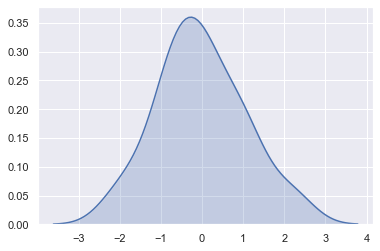

In [11]:
sns.kdeplot(x, shade=True);

KDE 的带宽（`bw`）参数控制估计与数据的拟合程度，就像直方图中的 bin 大小一样。 它对应于我们在上面绘制的内核的宽度。 默认行为尝试使用常用参考规则猜测一个好的值，但尝试更大或更小的值可能会有所帮助：

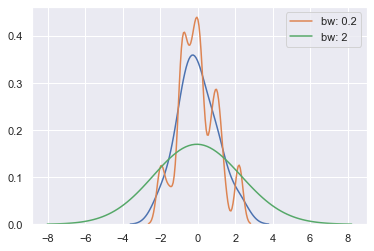

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

正如您在上面所看到的，高斯 KDE 过程的本质意味着估计超出了数据集中最大和最小的值。有可能控制超过极值多远的曲线是由'cut'参数绘制的;然而，这只影响曲线的绘制方式，而不影响曲线的拟合方式:

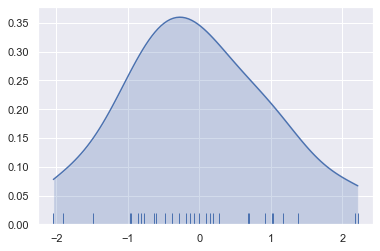

In [13]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

### 拟合参数分布

您还可以使用 [`distplot()`](../generated/seaborn.distplot.html#seaborn.distplot "seaborn.distplot")

将参数分布拟合到数据集上，并直观地评估其与观测数据的对应程度:

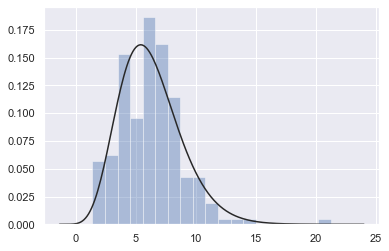

In [14]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

## 绘制二元分布

它对于可视化两个变量的二元分布也很有用。在 seaborn 中，最简单的方法就是使用[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")函数，它创建了一个多面板图形，显示了两个变量之间的二元(或联合)关系，以及每个变量在单独轴上的一元(或边际)分布。

In [17]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### 散点图

可视化二元分布最常见的方法是散点图，其中每个观察点都以 _x_ 和 _y_ 值表示。 这类似于二维 rug plot。 您可以使用 matplotlib 的`plt.scatter` 函数绘制散点图, 它也是 [`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")函数显示的默认类型的图:

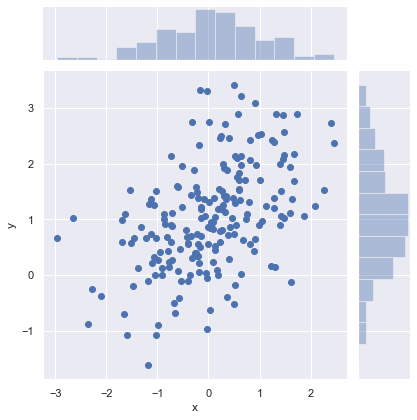

In [18]:
sns.jointplot(x="x", y="y", data=df);

### 六边形“桶”(Hexbin)图

类似于单变量的直方图，用于描绘二元变量关系的图称为 “hexbin” 图,因为它显示了落入六边形“桶”内的观察计数。 此图对于相对较大的数据集最有效。它可以通过调用 matplotlib 中的 `plt.hexbin`函数获得并且在[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")作为一种样式。当使用白色作为背景色时效果最佳。

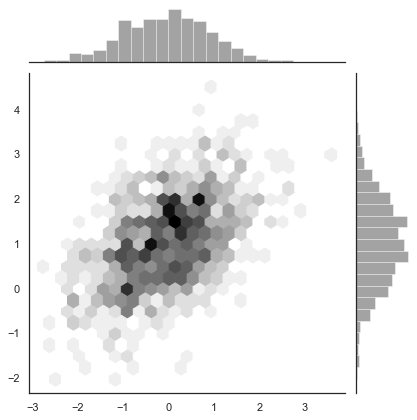

In [19]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### 核密度估计

也可以使用上面描述的核密度估计过程来可视化二元分布。在 seaborn 中，这种图用等高线图表示， 在[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")中被当作一种样式:

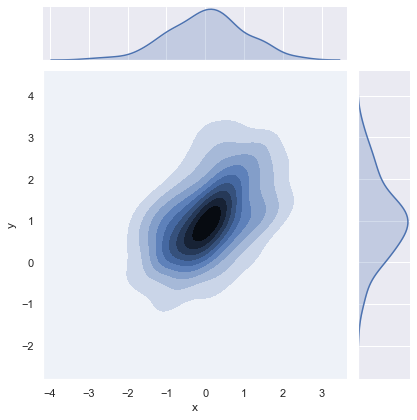

In [20]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

您还可以使用[`kdeplot()`](../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot")函数绘制二维核密度图。这允许您在一个特定的(可能已经存在的)matplotlib 轴上绘制这种图，而 [`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot") 函数能够管理它自己的图:

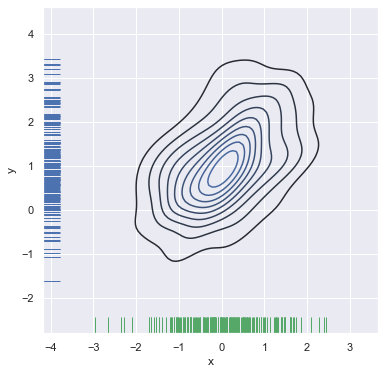

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

如果希望更连续地显示双变量密度，可以简单地增加轮廓层的数量:

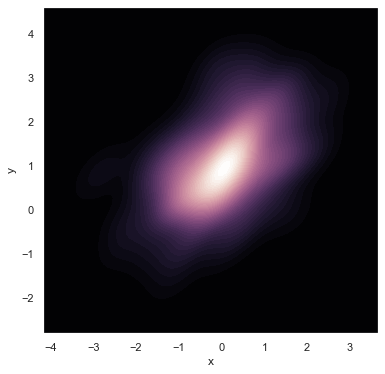

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")函数使用[`JointGrid`](../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid")来管理图形。为了获得更大的灵活性，您可能想直接使用[`JointGrid`](../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid")来绘制图形。[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")在绘图后返回[`JointGrid`](../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid")对象，您可以使用它添加更多图层或调整可视化的其他方面：

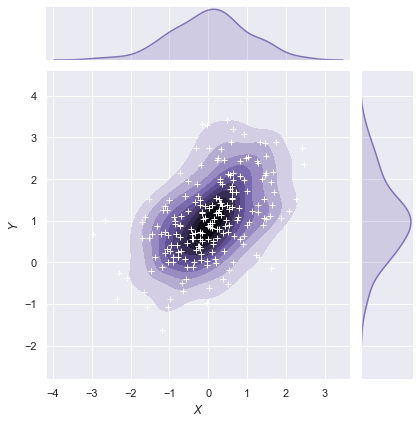

In [23]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## 可视化数据集中的成对关系

要在数据集中绘制多个成对的双变量分布，您可以使用[`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot")函数。 这将创建一个轴矩阵并显示 DataFrame 中每对列的关系，默认情况下，它还绘制对角轴上每个变量的单变量分布：

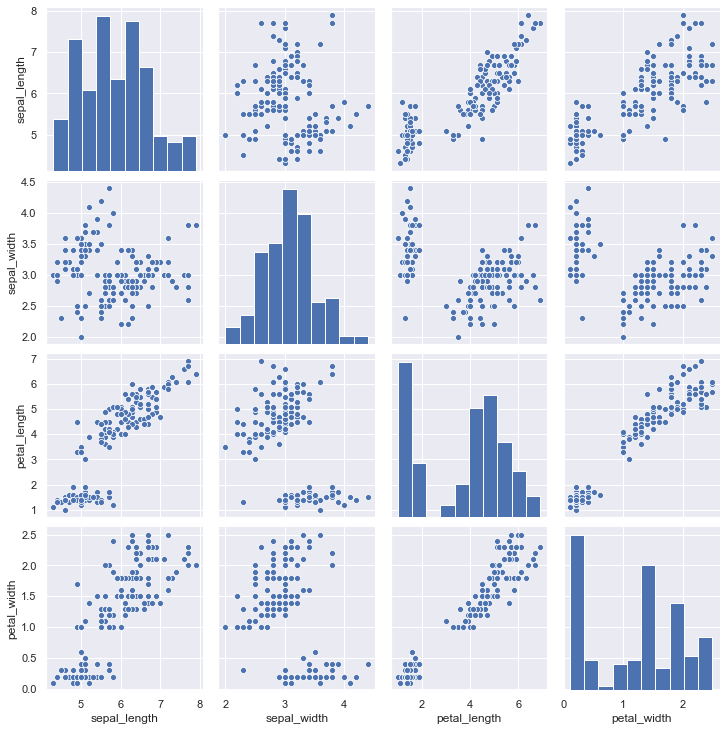

In [24]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

与[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")和[`JointGrid`](../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid")之间的关系非常类似， [`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot")函数构建在[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")对象之上, 可以直接使用它来获得更大的灵活性：

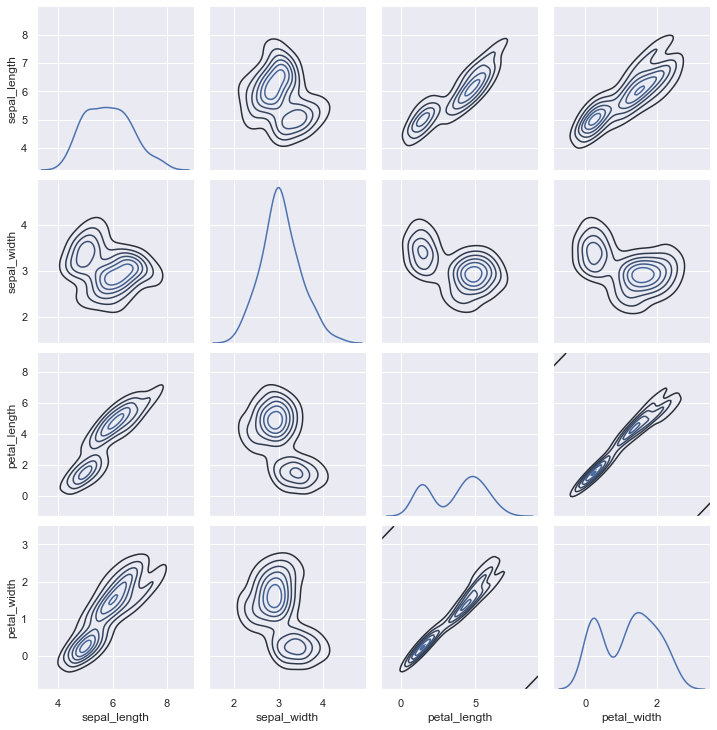

In [25]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);